# INFO 2950 Fall 2025 Main Project 


In [19]:
# imported like similar to homeworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression, LogisticRegression
# import duckdb
import requests
from bs4 import BeautifulSoup
import time

## Upload/Import data

In [20]:
unemployment_df = pd.read_csv("UnemploymentData.csv", header = None)
ethno_df = pd.read_csv("The Guide to Public Opinion and Electoral Behavior.csv")

#check
print(unemployment_df.head(15))
ethno_df.head(10)
#Note : real data starts at the 11th line of data set of first

                                                   0   \
0   Labor Force Statistics from the Current Popula...   
1                                 Original Data Value   
2                                                 NaN   
3                                          Series Id:   
4                                 Seasonally Adjusted   
5                                       Series title:   
6                                 Labor force status:   
7                                       Type of data:   
8                                                Age:   
9                                              Years:   
10                                                NaN   
11                                               Year   
12                                               1964   
13                                               1965   
14                                               1966   

                          1    2    3    4    5    6    7    8    9    10  \
0         

,Demographics,Subgroup,Total Cases,Year,Whites,Blacks,Chicanos/Hispanics,Asian-Americans
0,All,All,1532,1964,84.7,63.8,NaN,NaN
1,All,All,1273,1966,84.4,63.2,NaN,NaN
2,All,All,1503,1968,81.1,64.7,NaN,NaN
3,All,All,1469,1970,77.2,61.5,NaN,NaN
4,All,All,2120,1972,78.2,64.0,NaN,NaN
5,All,All,1525,1974,79.1,65.5,NaN,NaN
6,All,All,1869,1976,73.7,60.8,55.5,NaN
7,All,All,1382,1980,77.4,64.2,57.8,NaN
8,All,All,1321,1982,72.8,63.8,NaN,NaN
9,All,All,1902,1984,74.2,64.2,59.4,NaN


## Cleaning data for graphing the relationships


In [22]:
new_header = unemployment_df.iloc[11].tolist()
unemployment_data = unemployment_df[12:].copy()
unemployment_data.columns = new_header
unemployment_data.reset_index(drop = True, inplace = True)

if 'Year' not in unemployment_data.columns:
    unemployment_data.rename(columns={unemployment_data.columns[0]: 'Year'}, inplace = True)

#same type(numbers that we can work with)
month_cols = [col for col in unemployment_data.columns if col not in ['Year', 'Average Unemployment Rate']]
for col in month_cols:
    unemployment_data[col] = pd.to_numeric(unemployment_data[col], errors = 'coerce')

#yearly average unemployment rate
unemployment_data['Average Unemployment Rate'] = unemployment_data[month_cols].mean(axis = 1)

unemployment_data['Year'] = pd.to_numeric(unemployment_data['Year'], errors = 'coerce')

unemployment_cleaned = unemployment_data[['Year', 'Average Unemployment Rate']].dropna()

unemployment_cleaned['Year'] = unemployment_cleaned['Year'].astype(int)

#over lapping years
voting_years = [1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996,2000, 2004, 2008, 2012, 2016, 2020, 2024]
unemplo_voting = unemployment_cleaned[unemployment_cleaned['Year'].isin(voting_years)]


unemplo_voting.head(20)

,Year,Average Unemployment Rate
0,1964,5.158333
4,1968,3.558333
8,1972,5.600000
12,1976,7.700000
16,1980,7.175000
20,1984,7.508333
24,1988,5.491667
28,1992,7.491667
32,1996,5.408333
36,2000,3.966667


In [23]:
ethno_df = pd.read_csv("The Guide to Public Opinion and Electoral Behavior.csv")

ethno_avg = ethno_df[ethno_df['Subgroup'] == 'All']
print(np.unique(ethno_df['Subgroup']))
ethno_df = ethno_df[ethno_df['Subgroup'].isin(['White, non-Hispanic', 'Black, non-Hispanic', 'Hispanic', 'Other/Multiple races, non-Hispanic'])]
# ethno_avg = ethno_df.groupby('Year', as_index = False).mean(numeric_only = True)

# the above line is wrong bc the subgroups are not just the different races
# either way the average is included in the dataset under the 'All' subgroup

# print(ethno_df.head())
print(ethno_avg.head())
print(ethno_df.head())

['18-29' '18-29 Democrats' '18-29 Hispanics' '18-29 Independents'
 '18-29 Republicans' '18-29 blacks' '18-29 in Nonsouth' '18-29 in South'
 '18-29 men' '18-29 others' '18-29 whites' '18-29 women' '30-44'
 '30-44 Democrats' '30-44 Hispanics' '30-44 Independents'
 '30-44 Republicans' '30-44 blacks' '30-44 in Nonsouth' '30-44 in South'
 '30-44 men' '30-44 others' '30-44 whites' '30-44 women' '45-59'
 '45-59 Democrats' '45-59 Hispanics' '45-59 Independents'
 '45-59 Republicans' '45-59 blacks' '45-59 in Nonsouth' '45-59 in South'
 '45-59 men' '45-59 others' '45-59 whites' '45-59 women' '60+'
 '60+ Democrats' '60+ Hispanics' '60+ Independents' '60+ Republicans'
 '60+ blacks' '60+ in Nonsouth' '60+ in South' '60+ men' '60+ others'
 '60+ whites' '60+ women' 'All' 'Black Democrats' 'Black Independents'
 'Black Republicans' 'Black men' 'Black women' 'Black, non-Hispanic'
 'Blacks in Nonsouth' 'Blacks in South' 'College grad+'
 'College grad+ Democrats' 'College grad+ Hispanics'
 'College grad+ I

In [24]:
merged_df = pd.merge(ethno_df, unemplo_voting, on='Year', how='inner').sort_values('Year').reset_index(drop  = True)
merged_df.to_csv("merged_ethno_unemployment.csv", index = False)
# print out first couple

merged_df.head(20)

,Demographics,Subgroup,Total Cases,Year,Whites,Blacks,Chicanos/Hispanics,Asian-Americans,Average Unemployment Rate
0,race,"White, non-Hispanic",1367,1964,86.7,60.7,NaN,NaN,5.158333
1,race,"Black, non-Hispanic",155,1964,66.8,91.9,NaN,NaN,5.158333
2,race,"Black, non-Hispanic",144,1968,67.9,91.5,NaN,NaN,3.558333
3,race,"White, non-Hispanic",1344,1968,82.4,61.7,NaN,NaN,3.558333
4,race,"Other/Multiple races, non-Hispanic",3,1968,NaN,NaN,NaN,NaN,3.558333
5,race,Hispanic,12,1968,NaN,NaN,NaN,NaN,3.558333
6,race,"White, non-Hispanic",1871,1972,79.7,61.2,NaN,NaN,5.600000
7,race,"Black, non-Hispanic",208,1972,64.9,89.8,NaN,NaN,5.600000
8,race,"Other/Multiple races, non-Hispanic",15,1972,NaN,NaN,NaN,NaN,5.600000
9,race,Hispanic,26,1972,NaN,NaN,NaN,NaN,5.600000


## Graphs 

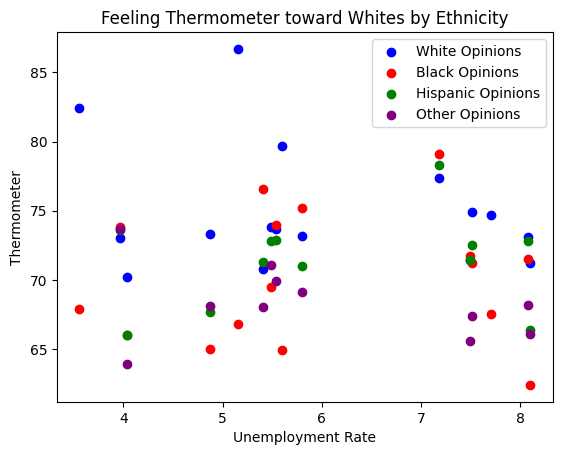

In [30]:
white_opinions = merged_df[merged_df['Subgroup'] == 'White, non-Hispanic']
black_opinions = merged_df[merged_df['Subgroup'] == 'Black, non-Hispanic']
hisp_opinions = merged_df[merged_df['Subgroup'] == 'Hispanic']
other_opinions = merged_df[merged_df['Subgroup'] == 'Other/Multiple races, non-Hispanic']


plt.scatter(white_opinions['Average Unemployment Rate'], white_opinions['Whites'], label='White Opinions', color='blue', marker='o')

plt.scatter(black_opinions['Average Unemployment Rate'], black_opinions['Whites'], label='Black Opinions', color='red', marker='o')

plt.scatter(hisp_opinions['Average Unemployment Rate'], hisp_opinions['Whites'], label='Hispanic Opinions', color='green', marker='o')

plt.scatter(other_opinions['Average Unemployment Rate'], other_opinions['Whites'], label='Other Opinions', color='purple', marker='o')


# Add labels and title
plt.xlabel('Unemployment Rate')
plt.ylabel('Thermometer')
plt.legend()
plt.title('Feeling Thermometer toward Whites by Ethnicity')
plt.show()

    Demographics             Subgroup  Total Cases  Year  Whites  Blacks  \
200         race  White, non-Hispanic         1367  1964    86.7    60.7   
201         race  White, non-Hispanic         1126  1966    85.7    60.4   
202         race  White, non-Hispanic         1344  1968    82.4    61.7   
203         race  White, non-Hispanic         1303  1970    78.8    58.7   
204         race  White, non-Hispanic         1871  1972    79.7    61.2   
205         race  White, non-Hispanic         1345  1974    79.8    63.3   
206         race  White, non-Hispanic         1637  1976    74.7    57.9   
207         race  White, non-Hispanic         1158  1980    77.4    60.6   
208         race  White, non-Hispanic         1118  1982    73.6    62.1   
209         race  White, non-Hispanic         1538  1984    74.9    62.5   
210         race  White, non-Hispanic         1598  1986     NaN    63.2   
211         race  White, non-Hispanic         1337  1988    73.8    57.4   
212         

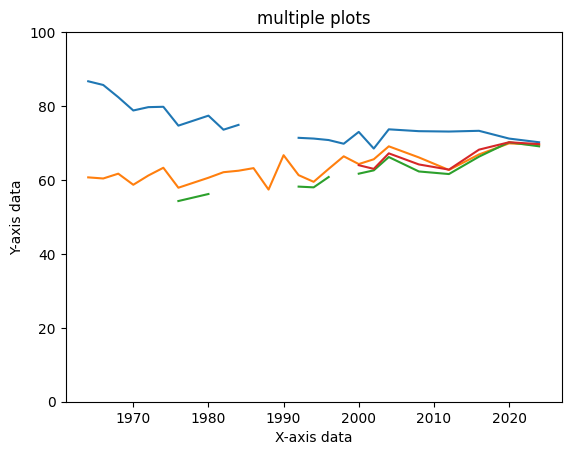

In [21]:
# np.unique(ethno_df['Subgroup'])
white_opinions = ethno_df[ethno_df['Subgroup'] == 'White, non-Hispanic']
print(white_opinions)
x = white_opinions['Year']
y1 = white_opinions['Whites']
y2 = white_opinions['Blacks']
y3 = white_opinions['Chicanos/Hispanics']
y4 = white_opinions['Asian-Americans']

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)


plt.xlabel("X-axis data")
plt.ylabel("Y-axis data")
plt.title('multiple plots')
plt.ylim(0, 100)
plt.show()